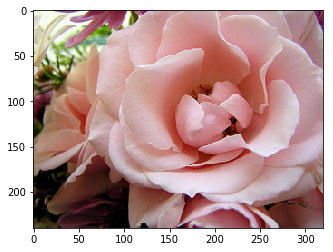

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
img=Image.open('./rose1.jpg')
plt.figure("rose")
plt.imshow(img)
plt.show()

In [ ]:
本代码片段为模型推理的示例
输入参数：
image:图片资源 
header：上传SK参数
URL根据模型部署后实际的URL

In [28]:
from __future__ import print_function
from requests_toolbelt  import MultipartEncoder
import numpy as np
import base64
import requests
import json
import tensorflow as tf

import datetime
import base64
import hmac
import hashlib

def get_current_date():
    date = datetime.datetime.strftime(datetime.datetime.utcnow(), "%a, %d %b %Y %H:%M:%S GMT")
    return date

def to_sha1_base64(signingStr, secret):
    #print(signingStr)
    hmacsha1 = hmac.new(secret.encode(), signingStr.encode(), hashlib.sha1)
    return base64.b64encode(hmacsha1.digest()).decode()

def main():
    #用户的AK
    ak = 'FXsUXZdH2XK1O1Ojz1jjl7aUm363ELlH5RTI'
    #用户的SK
    sk = 'EVcsozaND349GQnjp5CBsgPLORGbT5Ly75PWAtGELqbVK7BN0bNJKowgvez3umuK'

    #标识需要对哪些字段进行加密
    SignedHeaders = 'host;content-type;date'

    # 请求头字段说明 
    #  Host: 推理服务域名
    #  Content-Type: 请求内容类型 
    #  Date: 日期
    #  Authorization: 权限校验信息
    headers = {
        
                'Host': '502150.js01infer.wangsucloud.com:10000',
                'Content-Type': 'multipart/form-data;',
                'Date': get_current_date(),
                'Authorization': '权限校验信息'
             }
    
    files = {'image': ('rose1.jpg', open('./rose1.jpg', 'rb'), 'image/jpeg', {})}
    m = MultipartEncoder(files)
    headers['Content-Type'] = m.content_type
    print( headers['Content-Type'])
    
    #signingStr= host + \n + content-type + \n + date
    signingStr = headers['Host'] + '\n' + headers['Content-Type'] + '\n' + headers['Date']
    
    signature = to_sha1_base64(signingStr, sk)
    #Authorization = WS-HMAC-SHA1,
    #                AK=Zcg0eDmsZYK0cwmP1skyUmn9kwsmQM0HUU5, 
    #                SignedHeaders=host;content-type;date, 
    #                Signature=signature
    headers['Authorization'] = 'WS-HMAC-SHA1 '+ 'AK='+ ak +  ',SignedHeaders=' + SignedHeaders + ',Signature=' + signature
    print( headers['Authorization'])
    
    #print(m.content_type)
    #print(headers['Content-Type'])
    response = requests.post('http://502150.js01infer.wangsucloud.com:10000/ModelMaker/predict',data=m, headers=headers)
    response.raise_for_status()
    print(response)
    print(response.text)
    
if __name__ == '__main__':
  main()

multipart/form-data; boundary=e10a7b20a4ab4b65a04f00bee77c069a
WS-HMAC-SHA1 AK=FXsUXZdH2XK1O1Ojz1jjl7aUm363ELlH5RTI,SignedHeaders=host;content-type;date,Signature=XoLj2cR2t3zo7oyR4XDnxlINwmY=
<Response [200]>
{"predictions":[{"label":"daisy","probability":-3.282944440841675},{"label":"dandelion","probability":-4.38325309753418},{"label":"roses","probability":6.943681240081787},{"label":"sunflowers","probability":-2.0338501930236816},{"label":"tulips","probability":3.09025239944458}],"success":true}

